In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

## Create master DB for later use

In [2]:
import os
path = os.getcwd()

ratings_df = pd.read_csv(os.path.join(path,'ratings.csv'))

movies_df = pd.read_csv(os.path.join(path,'movies.csv'))

tmdb_df = pd.read_csv(os.path.join(path,'tmdb_data_combine.csv'))

links_df = pd.read_csv(os.path.join(path,'links.csv'))

In [3]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
links_df = links_df.dropna(axis=0)

In [5]:
links_df['tmdbId'] = links_df['tmdbId'].astype('int')

In [6]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings_df = ratings_df.merge(links_df , how='left' , on='movieId')

In [9]:
ratings_df.isna().sum()

userId        0
movieId       0
rating        0
timestamp     0
imdbId       13
tmdbId       13
dtype: int64

In [10]:
len(ratings_df)

100836

In [11]:
ratings_df = ratings_df.dropna(axis=0)
len(ratings_df)

100823

In [12]:
ratings_df['imdbId'] = ratings_df['imdbId'].astype('int')
ratings_df['tmdbId'] = ratings_df['tmdbId'].astype('int')
ratings_df.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,1,4.0,964982703,114709,862
1,1,3,4.0,964981247,113228,15602
2,1,6,4.0,964982224,113277,949
3,1,47,5.0,964983815,114369,807
4,1,50,5.0,964982931,114814,629


In [13]:
tmdb_df.head()

,overview,popularity,original_title,runtime,release_date,vote_average,vote_count,status,tagline,spoken_languages,cast,id
0,"The second ""visual album"" (a collection of sho...",8.738,Lemonade,65,2016-04-23,8.497,147,Released,NaN,en,Beyoncé|Jay-Z|Serena Williams|Zendaya|Quvenzha...,394269
1,"Set in 1929, a political boss and his advisor ...",17.518,Miller's Crossing,115,1990-09-21,7.455,1496,Released,"Up is down, black is white, and nothing is wha...",en|ga|it|yi,Gabriel Byrne|Albert Finney|Jon Polito|Marcia ...,379
2,A student's premonition of a deadly rollercoas...,40.900,Final Destination 3,93,2006-02-09,6.081,3549,Released,This ride will be the death of you.,en,Mary Elizabeth Winstead|Ryan Merriman|Kris Lem...,9286
3,"On Christmas Eve, three homeless people living...",21.095,東京ゴッドファーザーズ,93,2003-12-29,7.895,1076,Released,Meet the ultimate dysfunctional family.,en|ja|es,Aya Okamoto|Yoshiaki Umegaki|Tohru Emori|Satom...,13398
4,A wily old codger matches wits with the King o...,12.456,Darby O'Gill and the Little People,93,1959-06-24,6.700,130,Released,A touch O'Blarney... a heap O'Magic and A LOAD...,ga|en,Albert Sharpe|Janet Munro|Sean Connery|Jimmy O...,18887


In [14]:
tmdb_df.isna().sum()

overview               9
popularity             0
original_title         0
runtime                0
release_date           0
vote_average           0
vote_count             0
status                 0
tagline             1570
spoken_languages      33
cast                  44
id                     0
dtype: int64

In [15]:
tmdb_df = tmdb_df.fillna("notavailable")
tmdb_df.isna().sum()

overview            0
popularity          0
original_title      0
runtime             0
release_date        0
vote_average        0
vote_count          0
status              0
tagline             0
spoken_languages    0
cast                0
id                  0
dtype: int64

In [16]:
tmdb_df_categorical = tmdb_df[['overview','cast','id','popularity','runtime','vote_average']].copy()

In [17]:
# tmdb_df_numeric= tmdb_df[['popularity','runtime','vote_average','id']].copy()


In [18]:
ratings_df = ratings_df.merge(tmdb_df_categorical , how='left' , left_on='tmdbId' , right_on='id')

In [19]:
ratings_df.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,overview,cast,id,popularity,runtime,vote_average
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,862.0,100.954,81.0,7.970
1,1,3,4.0,964981247,113228,15602,A family wedding reignites the ancient feud be...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,15602.0,12.686,101.0,6.494
2,1,6,4.0,964982224,113277,949,Obsessive master thief Neil McCauley leads a t...,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...,949.0,58.478,170.0,7.908
3,1,47,5.0,964983815,114369,807,Two homicide detectives are on a desperate hun...,Morgan Freeman|Brad Pitt|Gwyneth Paltrow|Andre...,807.0,60.472,127.0,8.369
4,1,50,5.0,964982931,114814,629,"Held in an L.A. interrogation room, Verbal Kin...",Gabriel Byrne|Kevin Spacey|Stephen Baldwin|Kev...,629.0,39.571,106.0,8.193


In [20]:
ratings_df.isna().sum()

userId            0
movieId           0
rating            0
timestamp         0
imdbId            0
tmdbId            0
overview        315
cast            315
id              315
popularity      315
runtime         315
vote_average    315
dtype: int64

In [21]:
ratings_df = ratings_df.dropna(axis=0)
ratings_df.isna().sum()

userId          0
movieId         0
rating          0
timestamp       0
imdbId          0
tmdbId          0
overview        0
cast            0
id              0
popularity      0
runtime         0
vote_average    0
dtype: int64

In [22]:
len(ratings_df)

100508

In [23]:
movies_df_model = movies_df.copy() 
movies_df_model['genres'] = movies_df_model['genres'].str.replace("|" , " ")
movies_df_model['genres'] = movies_df_model['genres'].str.replace("(no genres listed)" , "nogenre")
movies_df_model.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
movies_df['genres'] = movies_df['genres'].str.replace("(no genres listed)" , "nogenre")
movies_df['genres'] = movies_df['genres'].str.split("|")
movies_df = movies_df.explode(column='genres')
genre_vocabulary = np.array(movies_df['genres'].str.lower().unique())
genre_vocabulary

array(['adventure', 'animation', 'children', 'comedy', 'fantasy',
       'romance', 'drama', 'action', 'crime', 'thriller', 'horror',
       'mystery', 'sci-fi', 'war', 'musical', 'documentary', 'imax',
       'western', 'film-noir', 'nogenre'], dtype=object)

In [25]:
movies_and_ratings = ratings_df.merge(movies_df_model[['movieId','title','genres']].copy() , how='left' , on='movieId')
movies_and_ratings.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,overview,cast,id,popularity,runtime,vote_average,title,genres
0,1,1,4.0,964982703,114709,862,"Led by Woody, Andy's toys live happily in his ...",Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,862.0,100.954,81.0,7.970,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,1,3,4.0,964981247,113228,15602,A family wedding reignites the ancient feud be...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,15602.0,12.686,101.0,6.494,Grumpier Old Men (1995),Comedy Romance
2,1,6,4.0,964982224,113277,949,Obsessive master thief Neil McCauley leads a t...,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...,949.0,58.478,170.0,7.908,Heat (1995),Action Crime Thriller
3,1,47,5.0,964983815,114369,807,Two homicide detectives are on a desperate hun...,Morgan Freeman|Brad Pitt|Gwyneth Paltrow|Andre...,807.0,60.472,127.0,8.369,Seven (a.k.a. Se7en) (1995),Mystery Thriller
4,1,50,5.0,964982931,114814,629,"Held in an L.A. interrogation room, Verbal Kin...",Gabriel Byrne|Kevin Spacey|Stephen Baldwin|Kev...,629.0,39.571,106.0,8.193,"Usual Suspects, The (1995)",Crime Mystery Thriller


In [26]:
movies_and_ratings.dtypes

userId            int64
movieId           int64
rating          float64
timestamp         int64
imdbId            int64
tmdbId            int64
overview         object
cast             object
id              float64
popularity      float64
runtime         float64
vote_average    float64
title            object
genres           object
dtype: object

In [27]:
movies_and_ratings['userId'] = movies_and_ratings['userId'].astype('str')
movies_and_ratings.dtypes

userId           object
movieId           int64
rating          float64
timestamp         int64
imdbId            int64
tmdbId            int64
overview         object
cast             object
id              float64
popularity      float64
runtime         float64
vote_average    float64
title            object
genres           object
dtype: object

In [28]:
movies_and_ratings_dict = {name: np.array(value) 
                         for name, value in movies_and_ratings.items()}

## Create dataset as required by TensorFlow

In [29]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

In [30]:
features_ds = tf.data.Dataset.from_tensor_slices(movies_and_ratings_dict)

In [31]:
# import tensorflow_datasets as tfds
# ratings = tfds.load("movielens/100k-ratings", split="train")

In [32]:
ratings_tf = features_ds.map(lambda x: {
    "movie_title": x["title"],
    "user_id": x["userId"],
    "user_rating": x["rating"],
    "movie_genre":x["genres"],
    "movie_overview":x["overview"], 
    "movie_cast":x["cast"],
    "movie_popularity":x["popularity"],
    "movie_runtime":x["runtime"],
    "movie_vote_average":x["vote_average"],
})


In [33]:
len(ratings_tf)

100508

## Divide into test and train

In [34]:
tf.random.set_seed(42)
shuffled = ratings_tf.shuffle(100508, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_508)

In [35]:
movie_titles = ratings_tf.batch(1_000_000).map(lambda x: x["movie_title"])
user_ids = ratings_tf.batch(1_000_000).map(lambda x: x["user_id"])
movie_genres = ratings_tf.batch(1_000_000).map(lambda x: x["movie_genre"])
movie_overviews = ratings_tf.batch(1_000_000).map(lambda x: x["movie_overview"])
movie_casts = ratings_tf.batch(1_000_000).map(lambda x: x["movie_cast"])
movie_popularities = ratings_tf.batch(1_000_000).map(lambda x: x["movie_popularity"])
movie_runtimes = ratings_tf.batch(1_000_000).map(lambda x: x["movie_runtime"])
movie_vote_averages = ratings_tf.batch(1_000_000).map(lambda x: x["movie_vote_average"])

unique_movie_titles = np.unique(np.concatenate(list(movie_titles)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))
unique_movie_genres = np.unique(np.concatenate(list(movie_genres)))

In [36]:
overview_vocab = np.array(movies_and_ratings['overview'])
cast_vocab = np.array(movies_and_ratings['cast'])

## Define Model Architecture

In [37]:
class RankingModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    embedding_dimension = 32
    max_tokens = 10_000
    
    # Compute embeddings for users.
    self.user_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ])

    # Compute embeddings for movies.
    self.movie_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_movie_titles, mask_token=None),
      tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
    ])
    
    # Genre vector
    self.genre_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens,
        standardize='lower',
        vocabulary=genre_vocabulary)

    self.genre_embedding = tf.keras.Sequential([
      self.genre_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 8, mask_zero=True),
      tf.keras.layers.GlobalAveragePooling1D()
    ])

    # Overview Vector
    self.overview_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens)
    
    self.overview_vectorizer.adapt(overview_vocab)

    self.overview_embedding = tf.keras.Sequential([
      self.overview_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 32, mask_zero=True),
      tf.keras.layers.GlobalAveragePooling1D()
    ])

    

    # Cast Vector
    self.cast_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens)
    
    self.cast_vectorizer.adapt(cast_vocab)

    self.cast_embedding = tf.keras.Sequential([
      self.cast_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 8, mask_zero=True),
      tf.keras.layers.GlobalAveragePooling1D()
    ])

    

    # Compute predictions.
    self.ratings = tf.keras.Sequential([
      # Learn multiple dense layers.
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      # tf.keras.layers.Dense(32, activation="relu"),
      # tf.keras.layers.Dense(16, activation="relu"),
      # Make rating predictions in the final layer.
      tf.keras.layers.Dense(1)
  ])
    


  def call(self, inputs):

    user_id, movie_title, movie_genre, movie_overview, movie_cast, movie_popularity, movie_runtime, movie_vote_average  = inputs

    # user_id, movie_title, movie_genre = inputs

    user_embedding = self.user_embeddings(user_id)
    movie_embedding = self.movie_embeddings(movie_title)
    genre_embedding = self.genre_embedding(movie_genre)
    overview_embedding = self.genre_embedding(movie_overview)
    cast_embedding = self.genre_embedding(movie_cast)
    movie_popularity_embed = tf.reshape(movie_popularity , [-1,1])
    movie_runtime_embed = tf.reshape(movie_runtime , [-1,1])
    movie_vote_average_embed = tf.reshape(movie_vote_average , [-1,1])

    return self.ratings(tf.concat([user_embedding, 
                                   movie_embedding,
                                   genre_embedding,
                                   overview_embedding,
                                   cast_embedding,
                                   movie_popularity_embed,
                                   movie_runtime_embed,
                                   movie_vote_average_embed],
                                   
                                   axis=1))

In [38]:
import tensorflow_recommenders as tfrs
task = tfrs.tasks.Ranking(
  loss = tf.keras.losses.MeanSquaredError(),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [39]:
from typing import Dict, Text
class MovielensModel(tfrs.models.Model):

  def __init__(self):
    super().__init__()
    self.ranking_model: tf.keras.Model = RankingModel()
    self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
      loss = tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

  def call(self, features: Dict[str, tf.Tensor]) -> tf.Tensor:
    return self.ranking_model(
        (features["user_id"], 
         features["movie_title"], 
         features["movie_genre"],
         features["movie_overview"],
         features["movie_cast"],
         features["movie_popularity"],
         features["movie_runtime"],
         features["movie_vote_average"]
         ))

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    labels = features.pop("user_rating")

    rating_predictions = self(features)

    # The task computes the loss and the metrics.
    return self.task(labels=labels, predictions=rating_predictions)

In [40]:
from matplotlib import pyplot as plt
from tensorflow import keras
import numpy as np 
from IPython.display import clear_output
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [41]:
model = MovielensModel()
model.compile(optimizer=tf.keras.optimizers.legacy.Adagrad(learning_rate=0.1))

cached_train = train.shuffle(100508).batch(8192).cache()
cached_test = test.batch(4096).cache()

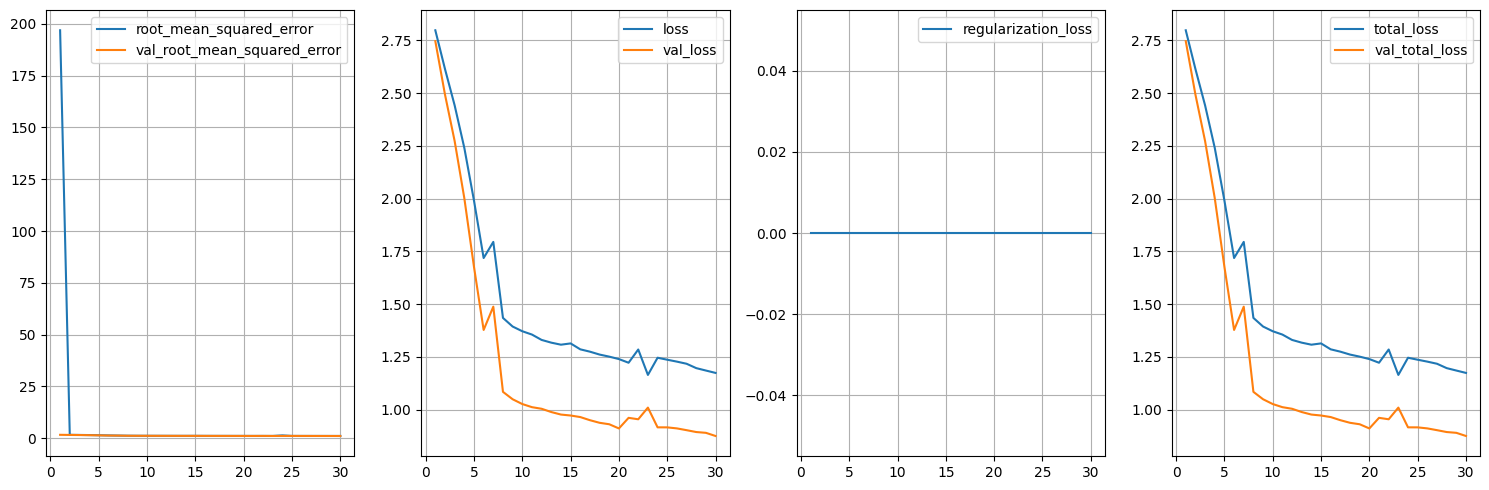

10/10 [==============================] - 2s 161ms/step - root_mean_squared_error: 1.0815 - loss: 1.1701 - regularization_loss: 0.0000e+00 - total_loss: 1.1701 - val_root_mean_squared_error: 1.0713 - val_loss: 0.8755 - val_regularization_loss: 0.0000e+00 - val_total_loss: 0.8755


In [42]:
# import datetime  
# log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


callbacks_list = [PlotLearning()]

model.fit(cached_train,validation_data=cached_test, epochs=30 , callbacks=callbacks_list)

In [43]:
model.evaluate(cached_test, return_dict=True)

6/6 [==============================] - 0s 28ms/step - root_mean_squared_error: 1.0713 - loss: 1.0701 - regularization_loss: 0.0000e+00 - total_loss: 1.0701


{'root_mean_squared_error': 1.0712673664093018,
 'loss': 0.875504195690155,
 'regularization_loss': 0,
 'total_loss': 0.875504195690155}